<a href="https://colab.research.google.com/github/ruthsj777/ai_art_generator/blob/main/stock_trend_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 AI Stock Trend Prediction
----------------------------------
Enter stock symbol (e.g. AAPL, RELIANCE.NS, TCS.NS): AAPL


/tmp/ipython-input-2270010579.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Fetching data for AAPL from 2022-01-01 to 2025-10-31 ...



✅ Model trained successfully!
 Prediction Accuracy: 0.55


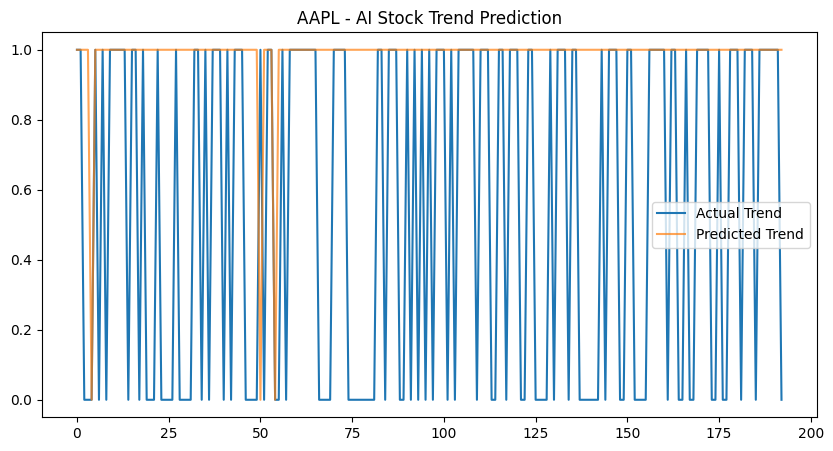

 Next Day Prediction for AAPL: 📈 UP


In [34]:
#Simple AI Stock Trend Predictor (final fixed version)
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import datetime

print(" AI Stock Trend Prediction")
print("----------------------------------")

#Only one input now
symbol = input("Enter stock symbol (e.g. AAPL, RELIANCE.NS, TCS.NS): ").strip().upper()

#Auto date range
start_date = "2022-01-01"
end_date = str(datetime.date.today())

#Download stock data
print(f"\nFetching data for {symbol} from {start_date} to {end_date} ...")
data = yf.download(symbol, start=start_date, end=end_date)

if data.empty:
    print("❌ No data found. Please check the symbol (e.g. RELIANCE.NS for Indian stocks).")
else:
    # Create target: 1 = up, 0 = down
    data["Target"] = (data["Close"].shift(-1) > data["Close"]).astype(int)

    # Remove the last NaN row to align features and labels
    data = data.dropna()

    X = data[["Open", "High", "Low", "Close", "Volume"]]
    y = data["Target"]

    # Technical Indicators
    data['MA10'] = data['Close'].rolling(10).mean()        # 10-day moving average
    data['MA50'] = data['Close'].rolling(50).mean()        # 50-day moving average
    data['EMA20'] = data['Close'].ewm(span=20, adjust=False).mean()  # Exponential MA
    data['RSI'] = 100 - (100 / (1 + (data['Close'].pct_change().rolling(14).apply(lambda x: (x[x>0].mean()) / (-x[x<0].mean())))))
    data['Volatility'] = data['Close'].rolling(10).std()   # Short-term volatility


    # Scale & split
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

    # Train model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"\n✅ Model trained successfully!")
    print(f" Prediction Accuracy: {acc:.2f}")

    # Plot results
    plt.figure(figsize=(10,5))
    plt.plot(y_test.values, label="Actual Trend")
    plt.plot(y_pred, label="Predicted Trend", alpha=0.7)
    plt.legend()
    plt.title(f"{symbol} - AI Stock Trend Prediction")
    plt.show()



    # 🔍 Predict next day
    next_pred = model.predict([X_scaled[-1]])[0]
    print(f" Next Day Prediction for {symbol}: {'📈 UP' if next_pred == 1 else '📉 DOWN'}")


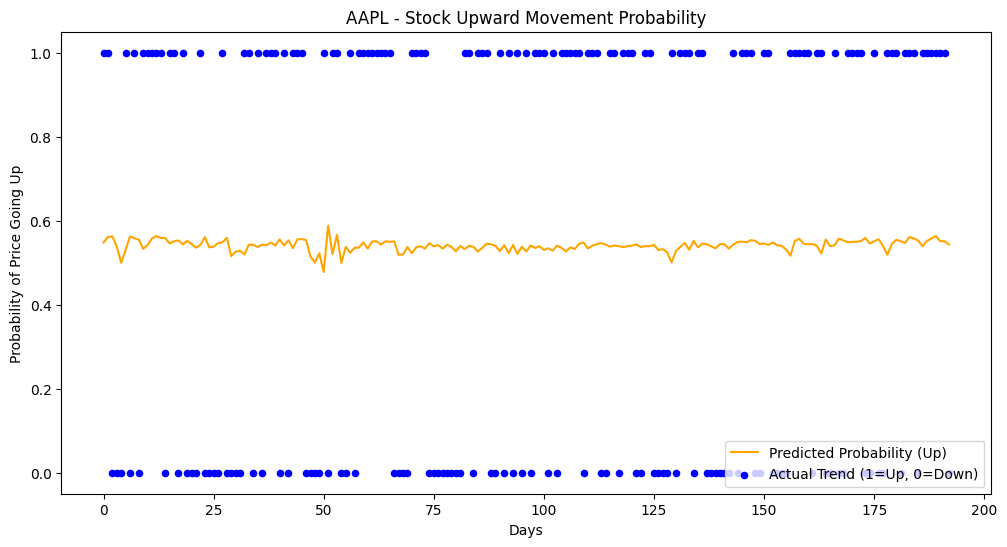

In [35]:
# Plot smoother probability curve
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of "Up"

plt.figure(figsize=(12,6))
plt.plot(y_prob, label="Predicted Probability (Up)", color="orange")
plt.scatter(range(len(y_test)), y_test, label="Actual Trend (1=Up, 0=Down)", color="blue", s=20)
plt.title(f"{symbol} - Stock Upward Movement Probability")
plt.xlabel("Days")
plt.ylabel("Probability of Price Going Up")
plt.legend()
plt.show()


✅ Model Accuracy: 54.92%


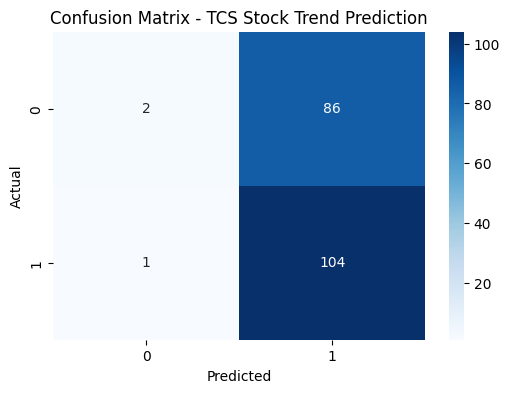


📋 Classification Report:
              precision    recall  f1-score   support

        Down       0.67      0.02      0.04        88
          Up       0.55      0.99      0.71       105

    accuracy                           0.55       193
   macro avg       0.61      0.51      0.37       193
weighted avg       0.60      0.55      0.40       193



In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# 🧩 Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy*100:.2f}%")

# 🧮 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - TCS Stock Trend Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📊 Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Down", "Up"]))
